**TASK 1:**

**Visualization using bar plot: **

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv to Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv")

In [ ]:
df.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

In [ ]:
df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


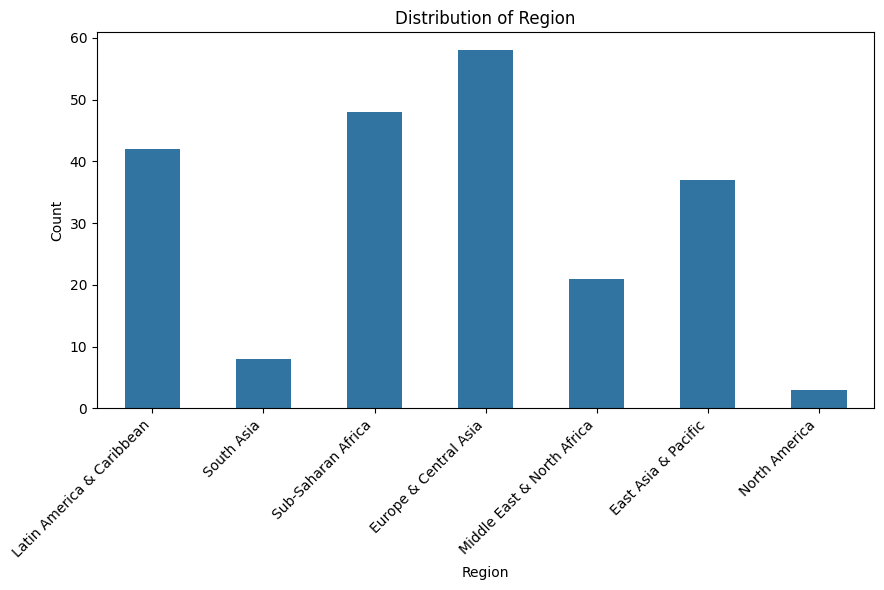

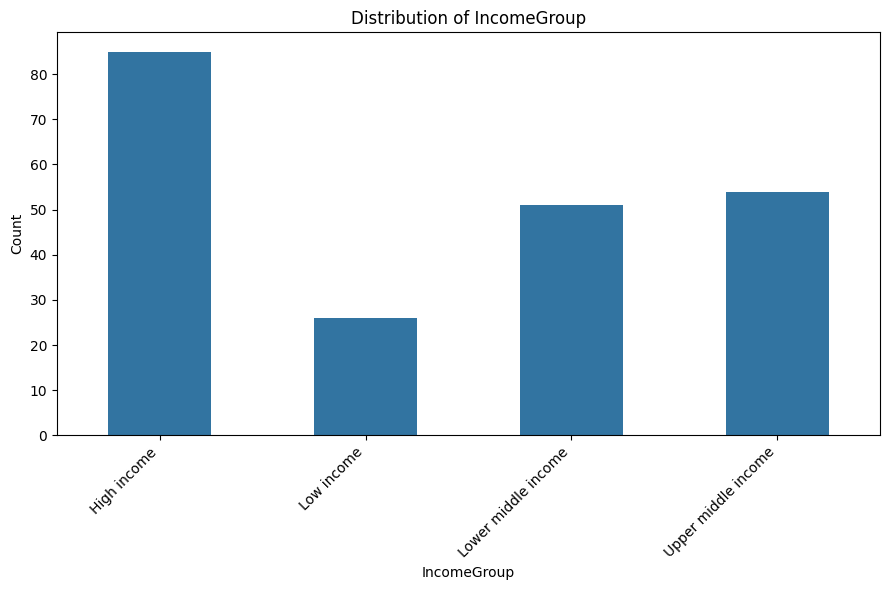

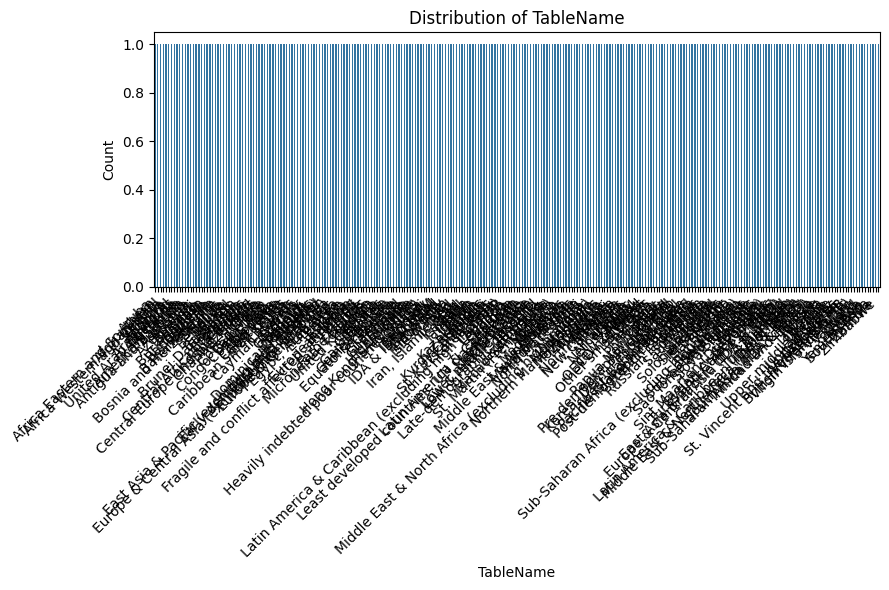

In [ ]:
categorical_columns = ['Region', 'IncomeGroup', 'TableName']

for column in categorical_columns:
    plt.figure(figsize=(9, 6))
    sns.countplot(x=column, data=df, width=0.5)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()



**TASK 2:**

**Data cleaning and EDA:**

In [61]:
uploaded=files.upload()

Saving superstore_dataset.csv to superstore_dataset.csv


In [62]:
data=pd.read_csv("superstore_dataset.csv")

In [63]:
data.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [64]:
data.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
customer,0
manufactory,0
product_name,0
segment,0
category,0
subcategory,0
region,0


In [65]:
data.duplicated().sum()

1

In [66]:
data.drop_duplicates(inplace=True)

In [67]:
data.duplicated().sum()

0

                    zip  discount    profit  quantity     sales  profit_margin
zip            1.000000  0.058471 -0.029968  0.012731 -0.023851      -0.064418
discount       0.058471  1.000000 -0.219481  0.008680 -0.028197      -0.864454
profit        -0.029968 -0.219481  1.000000  0.066241  0.479067       0.223727
quantity       0.012731  0.008680  0.066241  1.000000  0.200808      -0.005308
sales         -0.023851 -0.028197  0.479067  0.200808  1.000000       0.003447
profit_margin -0.064418 -0.864454  0.223727 -0.005308  0.003447       1.000000


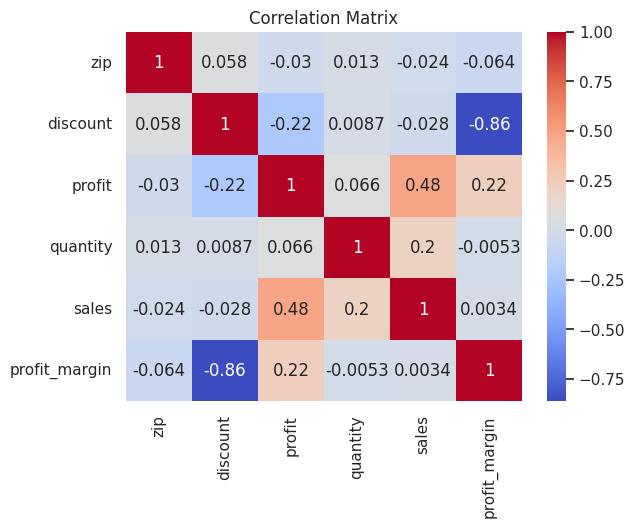

In [68]:
numerical_data = data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()
print(correlation_matrix)

# Visualization using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

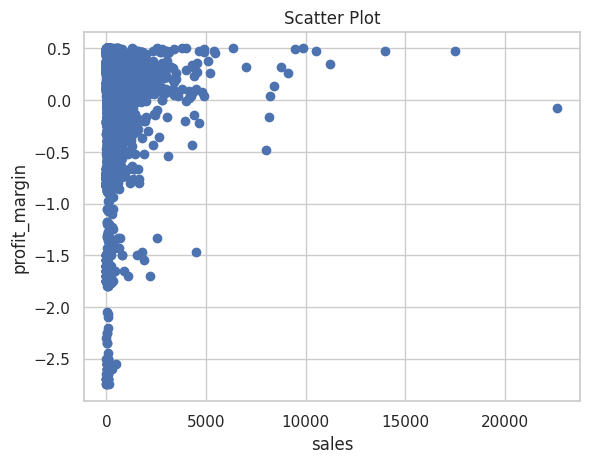

In [69]:
import matplotlib.pyplot as plt

plt.scatter(data['sales'], data['profit_margin'])
plt.title('Scatter Plot')
plt.xlabel('sales')
plt.ylabel('profit_margin')
plt.show()

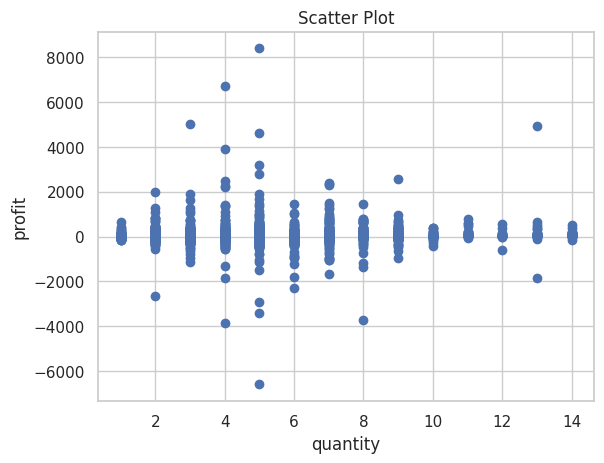

In [70]:
import matplotlib.pyplot as plt

plt.scatter(data['quantity'], data['profit'])
plt.title('Scatter Plot')
plt.xlabel('quantity')
plt.ylabel('profit')
plt.show()

In [71]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')

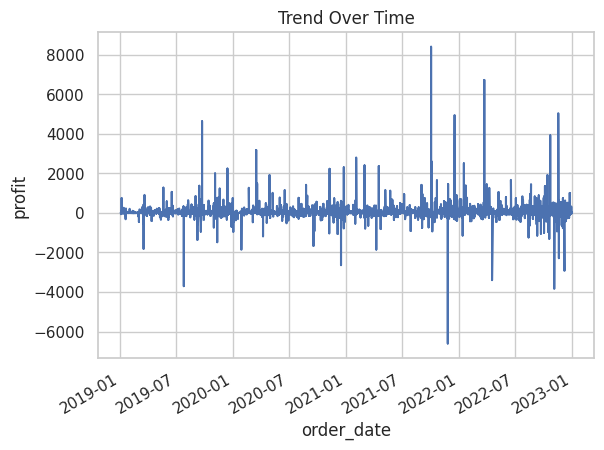

In [72]:
import matplotlib.pyplot as plt

# Assuming 'DateColumn' and 'NumericalColumn' are your columns
data['order_date'] = pd.to_datetime(data['order_date'])  # Convert to datetime if needed
data.set_index('order_date', inplace=True)
data['profit'].plot()
plt.title('Trend Over Time')
plt.xlabel('order_date')
plt.ylabel('profit')
plt.show()

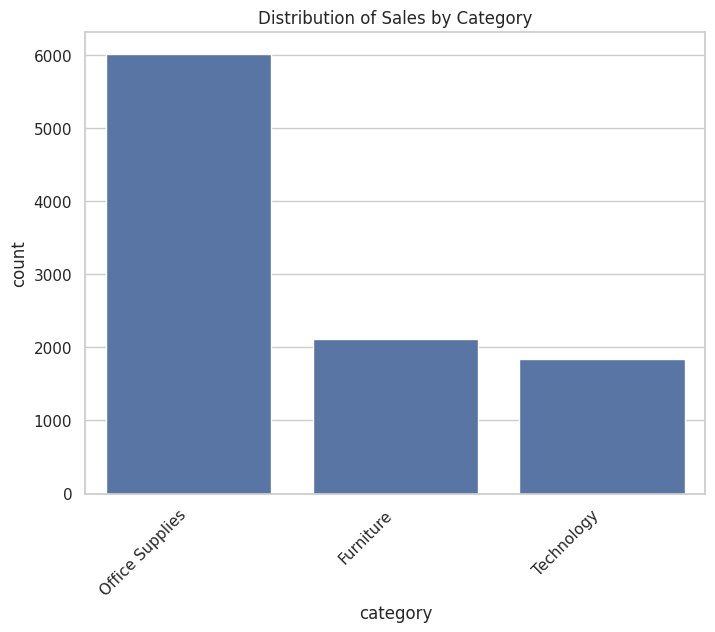

In [77]:
#Distribution of Sales by Category
plt.figure(figsize=(8, 6))
sns.countplot(x="category", data=data, order=data['category'].value_counts().index)
plt.title("Distribution of Sales by Category")
plt.xticks(rotation=45, ha='right')
plt.show()

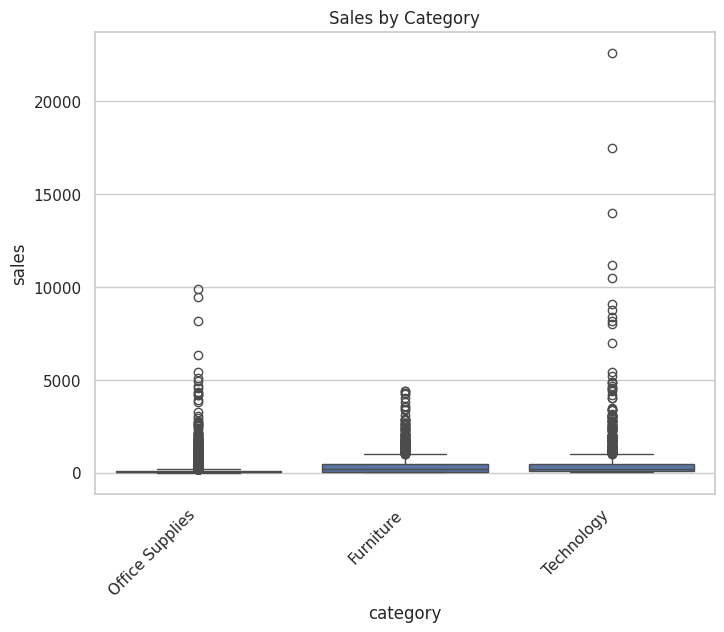

In [79]:
#Sales by Category
plt.figure(figsize=(8, 6))
sns.boxplot(x="category", y="sales", data=data)
plt.title("Sales by Category")
plt.xticks(rotation=45, ha='right')
plt.show()

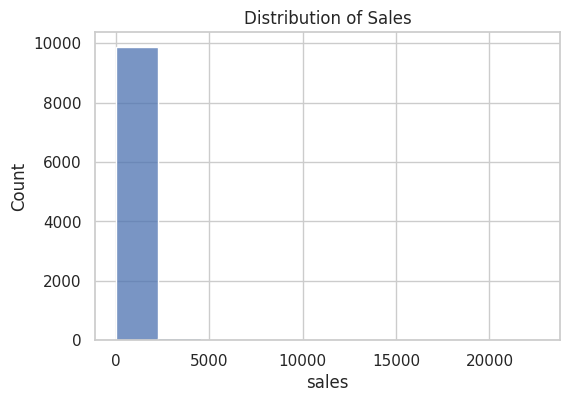

In [80]:
#distribution of sales
plt.figure(figsize=(6, 4))
sns.histplot(data['sales'], bins=10)
plt.title("Distribution of Sales")
plt.show()

**TASK 3:**

**Build a decision tree classifier:**

In [ ]:
uploaded=files.upload()

Saving SeoulBikeData.csv to SeoulBikeData.csv


In [ ]:
df1 = pd.read_csv("SeoulBikeData.csv", encoding='latin-1')

In [ ]:
df1.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Rename the complex columns name
bike_df=df1.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
#Assign the value in X and Y
X = bike_df.drop(columns=['Rented_Bike_Count','Date','Seasons', 'Holiday', 'Functioning_Day'], axis=1)
y = np.sqrt(bike_df['Rented_Bike_Count'])

In [ ]:
X.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [ ]:
y.head()

,Rented_Bike_Count
0,15.937377
1,14.282857
2,13.152946
3,10.344080
4,8.831761


In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 9)
(2190, 9)


In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features=9, max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# Import mean_absolute_error
from sklearn.metrics import mean_absolute_error

#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7159353936830155
MSE : 43.74330154946912
RMSE : 6.613871903013327
MAE : 4.179675315978668
R2 : 0.7159353936830155
Adjusted R2 : 0.7147626498954682


Looks like our r2 score value is 0.71 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )



MSE : 62.741521778415894
RMSE : 7.920954600199138
MAE : 4.835324365787059
R2 : 0.6028173051368954
Adjusted R2 : 0.6011775600663596


The r2_score for the test set is 0.62. This means our linear model is performing well on the data.

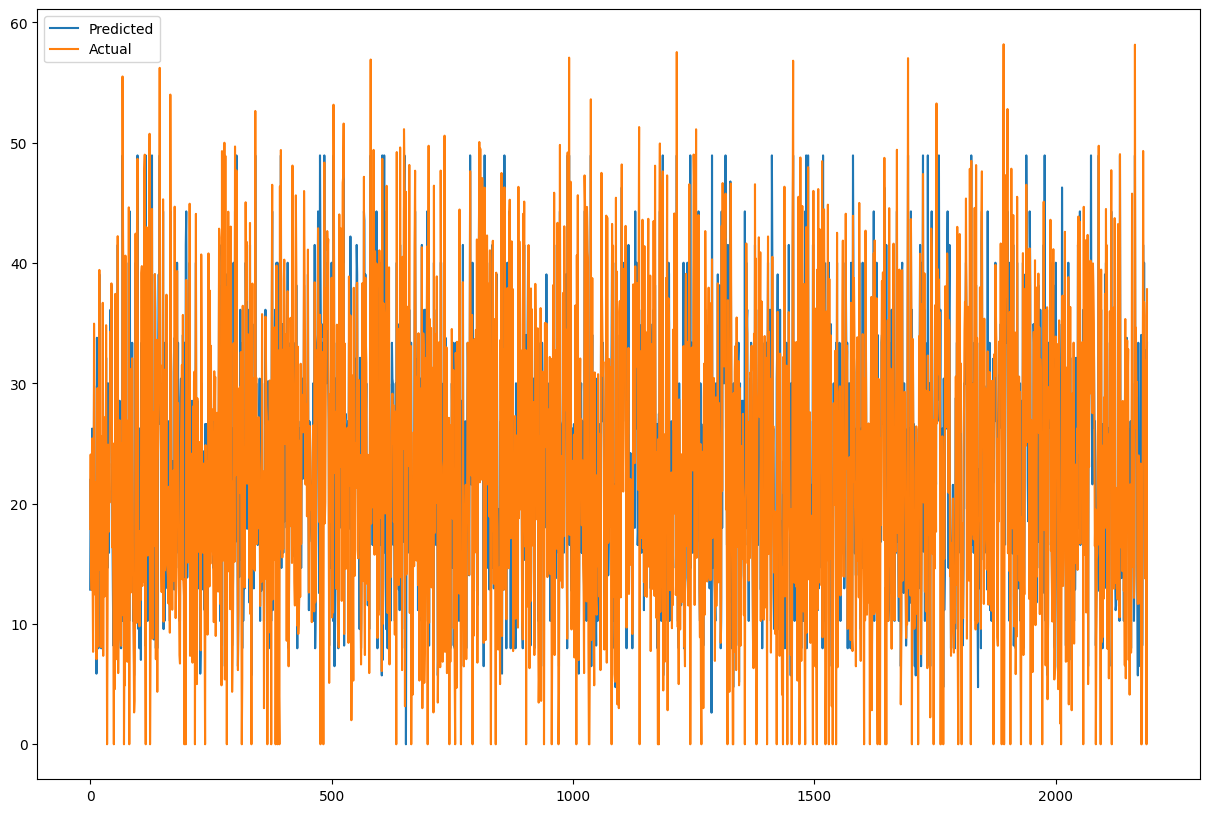

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Decision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=pd.DataFrame(dict2,index=[1])


#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

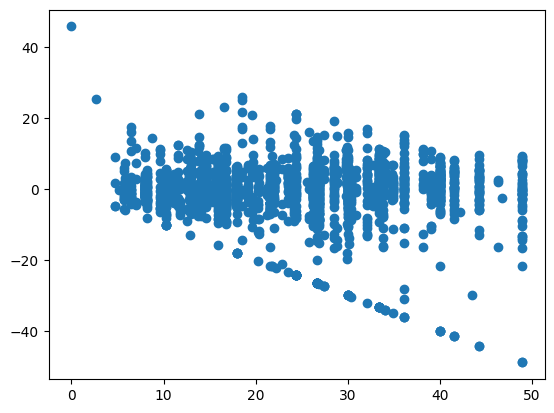

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

**TASK 4:**

**Sentiment analysis**

**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files

In [9]:
uploaded=files.upload()

Saving twitter_training.csv to twitter_training.csv


In [10]:
column_names = ['ID', 'entity', 'sentiment', 'comment']
df = pd.read_csv('twitter_training.csv', header=0, names=column_names)

In [11]:
df.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [12]:
df.shape

(74681, 4)

In [13]:
# Count of unique entities
entity_count = df['entity'].value_counts()
print(entity_count)

entity
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)        

In [14]:
df.info

<bound method DataFrame.info of          ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                 comment  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just realized the windows partition of my Mac ...  
74679  Just realized between the windows partition of...  
74680  Just like the windows partition of my Mac is l...  

[74681 rows x 4 columns]>

In [15]:
#Checking For Duplicates
duplicates = df.duplicated()
duplicated_rows = df[duplicates]
duplicated_rows.count()

,0
ID,2700
entity,2700
sentiment,2700
comment,2340


In [16]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)

In [17]:
#Checking for Missing Values :
df.isnull().sum()

,0
ID,0
entity,0
sentiment,0
comment,326


In [18]:
# Dropping missing value [ Using Dropna]
df = df.dropna()

In [19]:
df.isnull().sum()

,0
ID,0
entity,0
sentiment,0
comment,0


In [20]:
# Number of Unique Values
df.nunique()

,0
ID,12447
entity,32
sentiment,4
comment,69490


In [21]:
for i in range(5):
    print(f"{i+1}: {df['comment'][i]}   ->   {df['sentiment'][i]}")

1: I am coming to the borders and I will kill you all,   ->   Positive
2: im getting on borderlands and i will kill you all,   ->   Positive
3: im coming on borderlands and i will murder you all,   ->   Positive
4: im getting on borderlands 2 and i will murder you me all,   ->   Positive
5: im getting into borderlands and i can murder you all,   ->   Positive


**Sentiment Analysis**

In [22]:
#Sentiment Analysis
df['sentiment'].value_counts()

,count
sentiment,
Negative,21698
Positive,19712
Neutral,17708
Irrelevant,12537


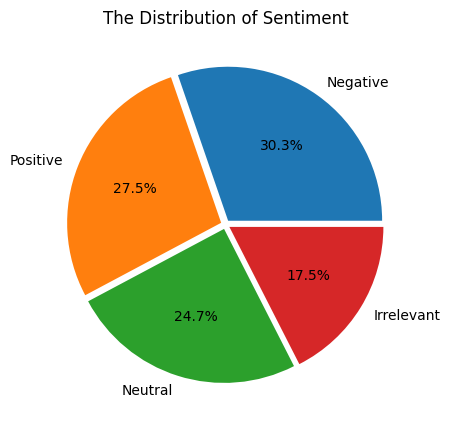

In [23]:
plt.figure(figsize=(10,5))
plt.pie(x=df['sentiment'].value_counts().values,
        labels=df['sentiment'].value_counts().index,
        autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()


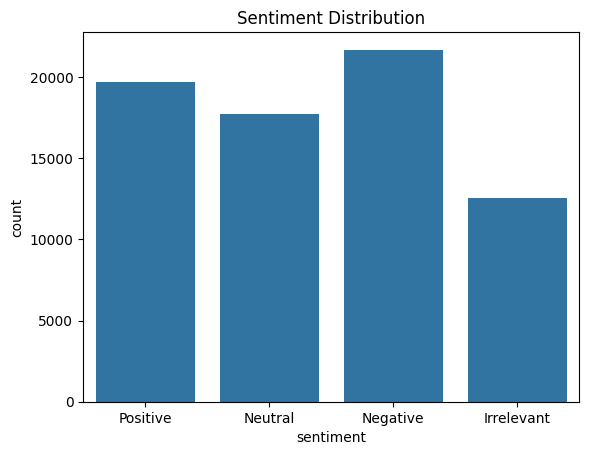

In [24]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

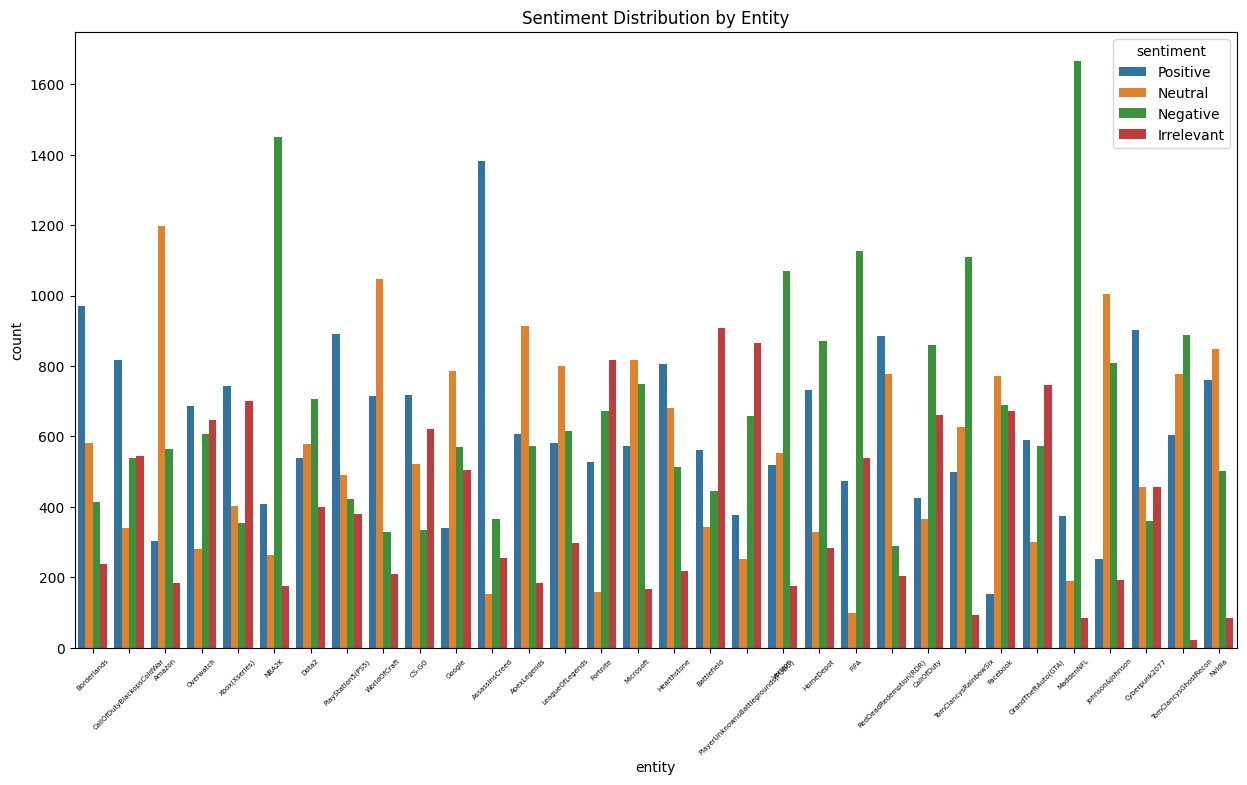

In [25]:
plt.figure(figsize=(15, 8))
sns.countplot(x='entity', hue='sentiment', data=df)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=5)
plt.show()


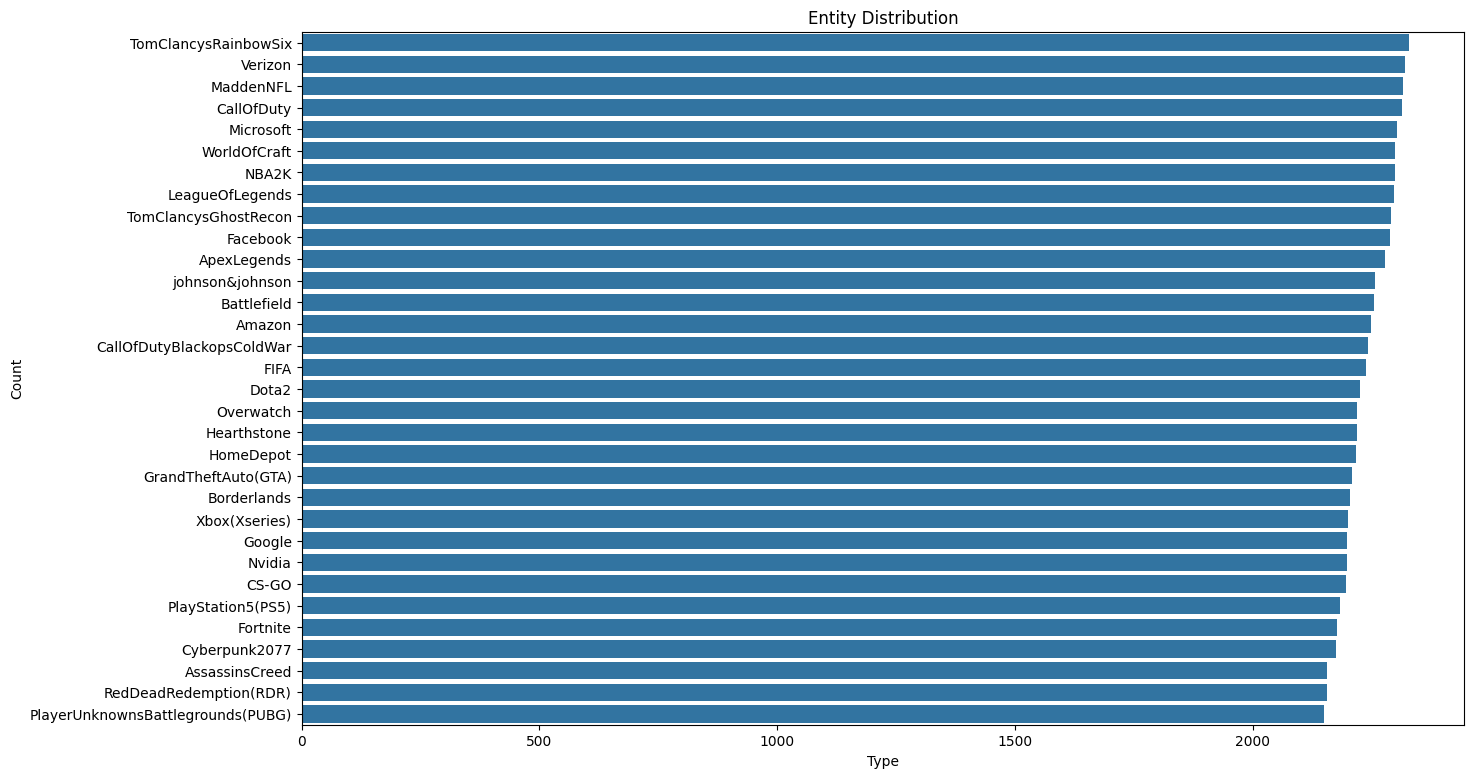

In [26]:
plt.figure(figsize=(15,9))
sns.barplot(x=df['entity'].value_counts().values,y=df['entity'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

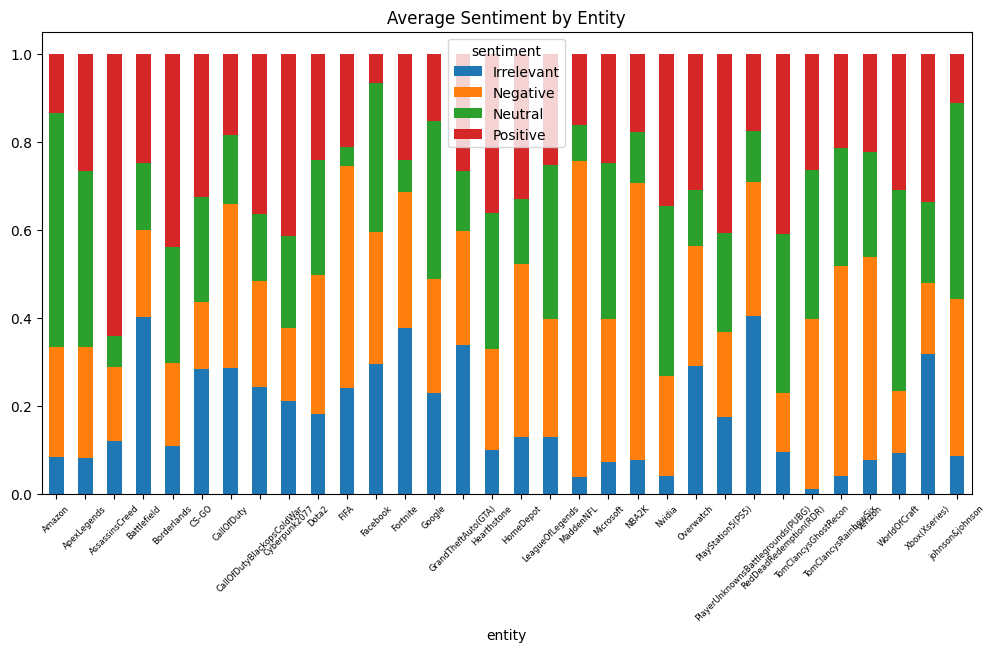

In [27]:
average_sentiment_by_entity = df.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45, fontsize=6)
plt.show()

Word Cloud

In [28]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [31]:
df["comment"] = df["comment"].apply(clean)

<ipython-input-31-213ab282b395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["comment"] = df["comment"].apply(clean)


In [32]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')

In [33]:
#Positive Sentiment Word Cloud:
from PIL import Image, ImageDraw, ImageFont

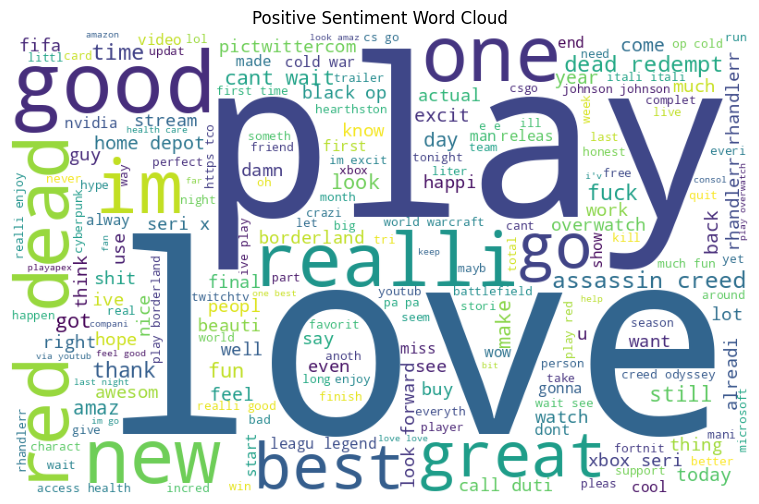

In [34]:
positive_data = df[df['sentiment'] == 'Positive']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

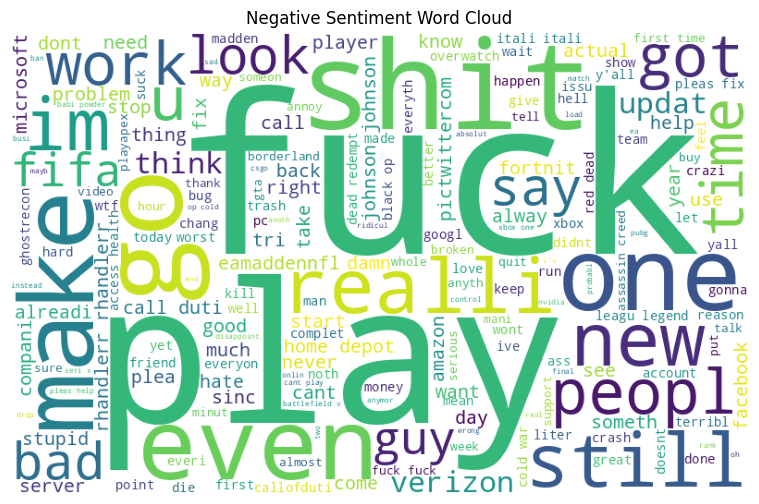

In [35]:
#Negative Sentiment Word Cloud:
negative_data = df[df['sentiment'] == 'Negative']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
negative_data = negative_data.replace("game", "")
if negative_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")

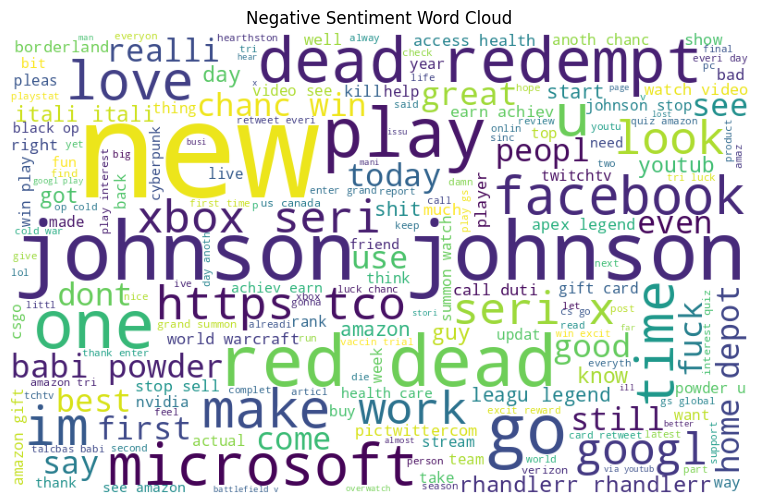

In [36]:
#Neutral Sentiment Word Cloud:
neutral_data = df[df['sentiment'] == 'Neutral']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
neutral_data = neutral_data.replace("game", "")
if neutral_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")

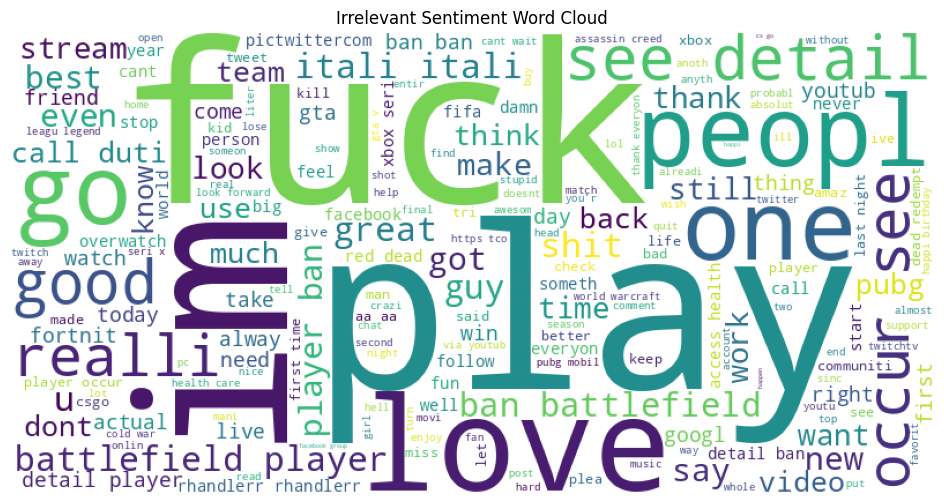

In [38]:
#Irrelevant Sentiment Word Cloud:
irrelevant_data = df[df['sentiment'] == 'Irrelevant']['comment'].str.cat(sep=" ")

irrelevant_data = irrelevant_data.replace("game", "")

if irrelevant_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_data)
    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")

**Task-5**

In [41]:
uploaded=files.upload()

Saving accidents.csv to accidents.csv


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load data from the CSV file
accident_data = pd.read_csv("accidents.csv", parse_dates=["AccidentDate"])

In [44]:
accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccidentDate      50000 non-null  object
 1   Timing            50000 non-null  object
 2   State             50000 non-null  object
 3   WeatherCondition  50000 non-null  object
 4   RoadCondition     50000 non-null  object
 5   Deaths            50000 non-null  int64 
 6   Reason            50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [45]:
accident_data.describe()

,Deaths
count,50000.000000
mean,4.983040
std,3.160581
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


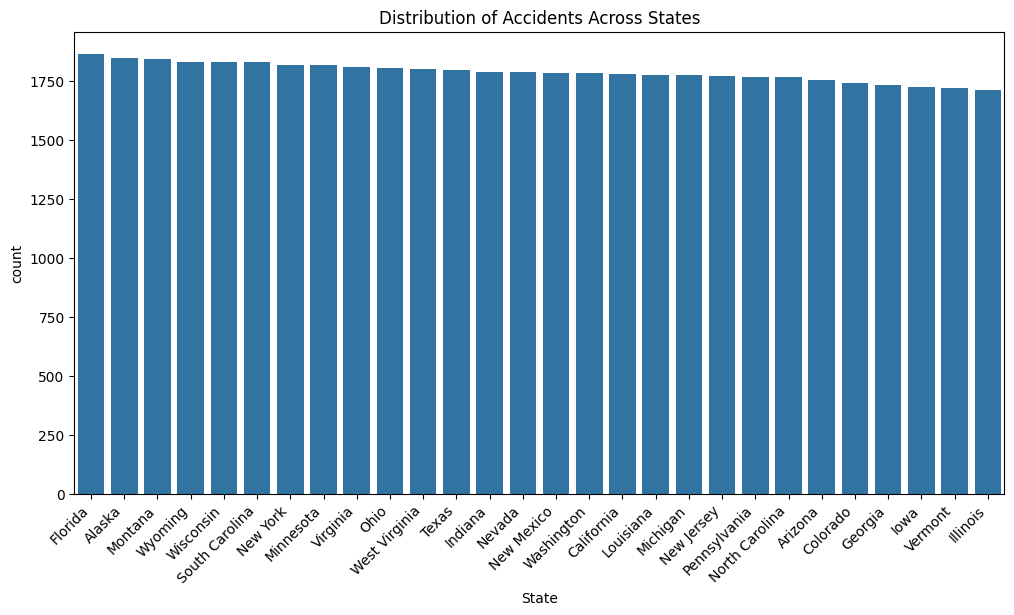

In [46]:
# Explore the distribution of accidents across different states
plt.figure(figsize=(12, 6))
sns.countplot(x="State", data=accident_data, order=accident_data['State'].value_counts().index)
plt.title("Distribution of Accidents Across States")
plt.xticks(rotation=45, ha="right")
plt.show()

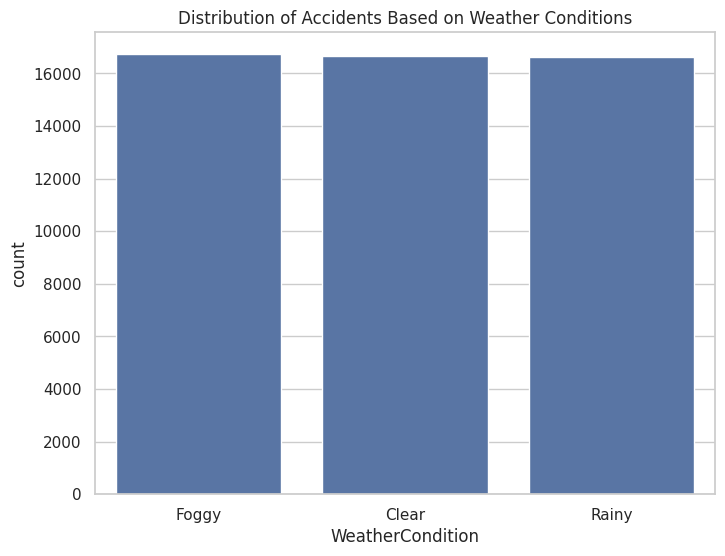

In [60]:
# Explore the distribution of accidents based on weather conditions
plt.figure(figsize=(8, 6))
sns.countplot(x="WeatherCondition", data=accident_data, order=accident_data['WeatherCondition'].value_counts().index)
plt.title("Distribution of Accidents Based on Weather Conditions")
plt.show()

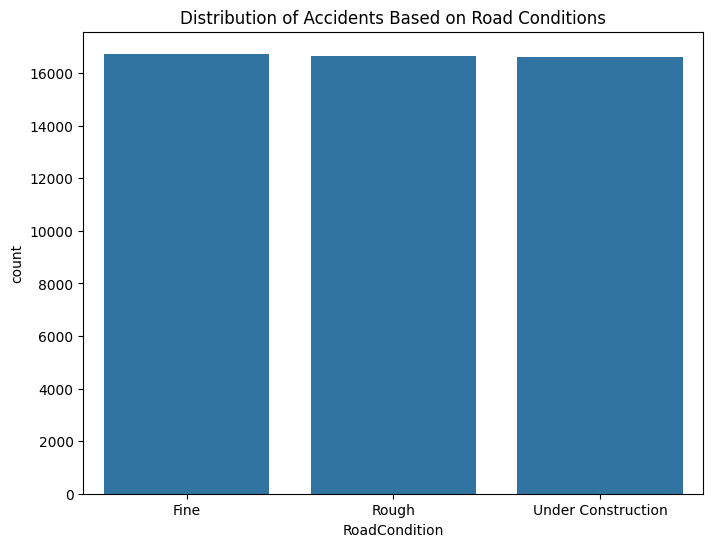

In [48]:
# Explore the distribution of accidents based on road conditions
plt.figure(figsize=(8, 6))
sns.countplot(x="RoadCondition", data=accident_data, order=accident_data['RoadCondition'].value_counts().index)
plt.title("Distribution of Accidents Based on Road Conditions")
plt.show()

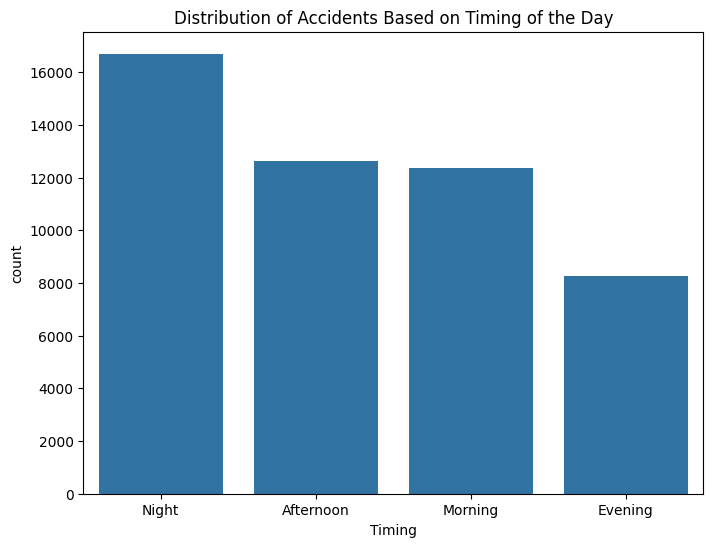

In [49]:
# Explore the distribution of accidents based on the timing of the day
plt.figure(figsize=(8, 6))
sns.countplot(x="Timing", data=accident_data, order=accident_data['Timing'].value_counts().index)
plt.title("Distribution of Accidents Based on Timing of the Day")
plt.show()

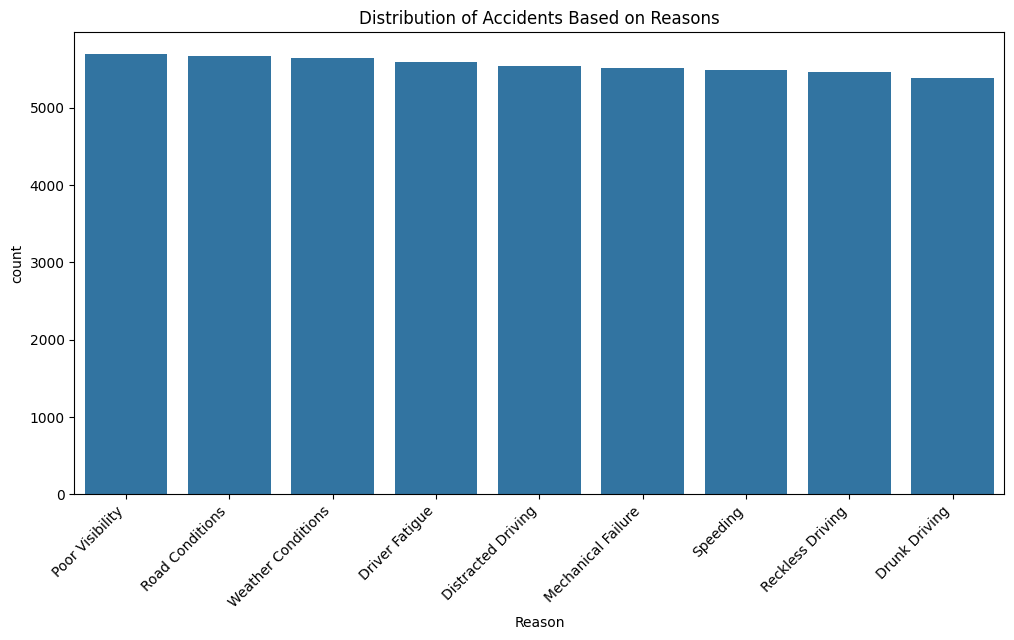

In [50]:
# Explore the reasons for accidents
plt.figure(figsize=(12, 6))
sns.countplot(x="Reason", data=accident_data, order=accident_data['Reason'].value_counts().index)
plt.title("Distribution of Accidents Based on Reasons")
plt.xticks(rotation=45, ha="right")
plt.show()

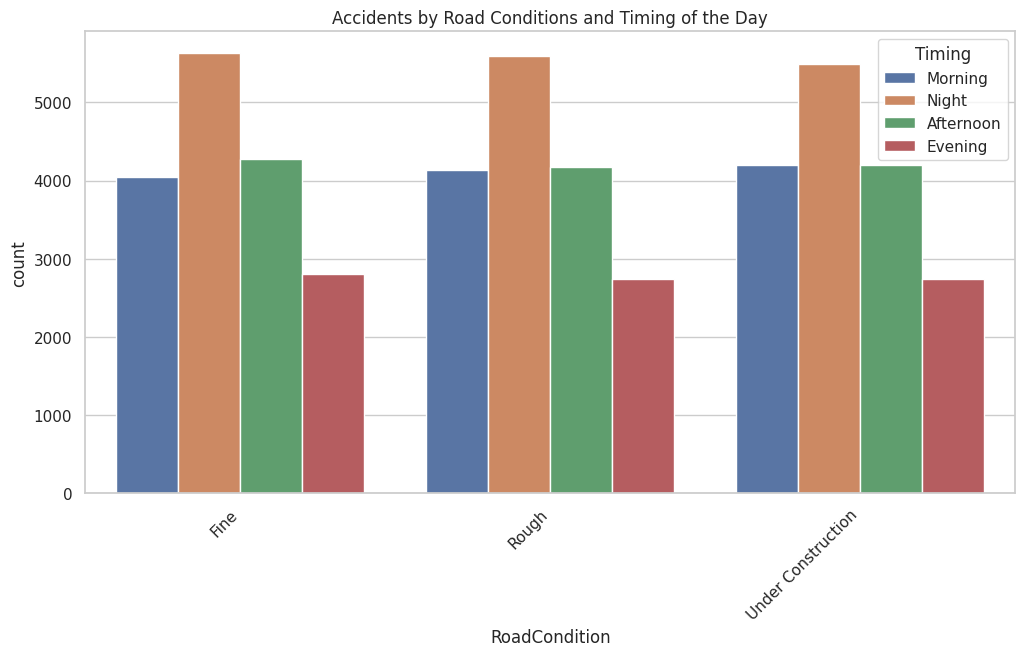

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Explore patterns related to road conditions
plt.figure(figsize=(12, 6))
sns.countplot(x="RoadCondition", hue="Timing", data=accident_data, order=accident_data['RoadCondition'].value_counts().index)
plt.title("Accidents by Road Conditions and Timing of the Day")
plt.xticks(rotation=45, ha="right")
plt.show()

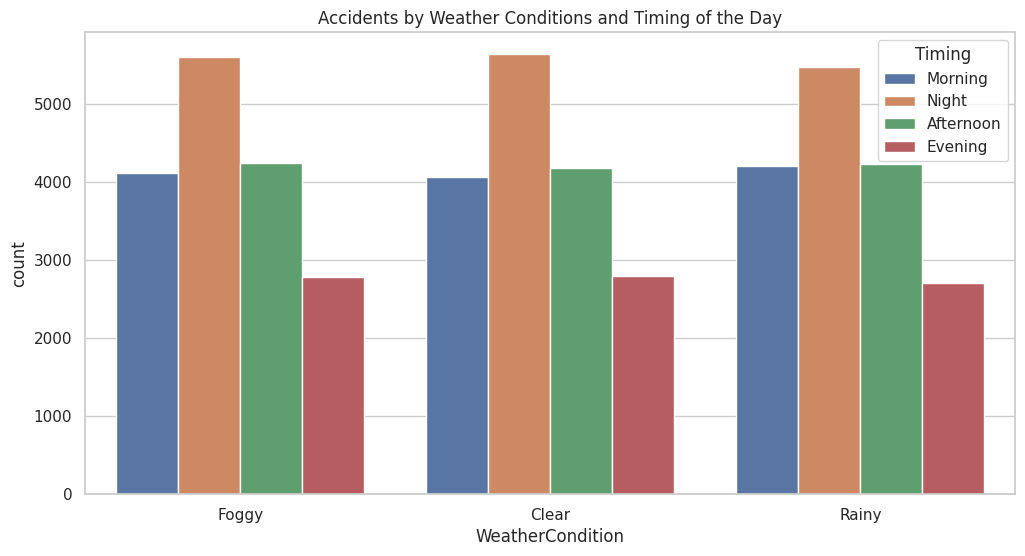

In [52]:
# Explore patterns related to weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x="WeatherCondition", hue="Timing", data=accident_data, order=accident_data['WeatherCondition'].value_counts().index)
plt.title("Accidents by Weather Conditions and Timing of the Day")
plt.show()

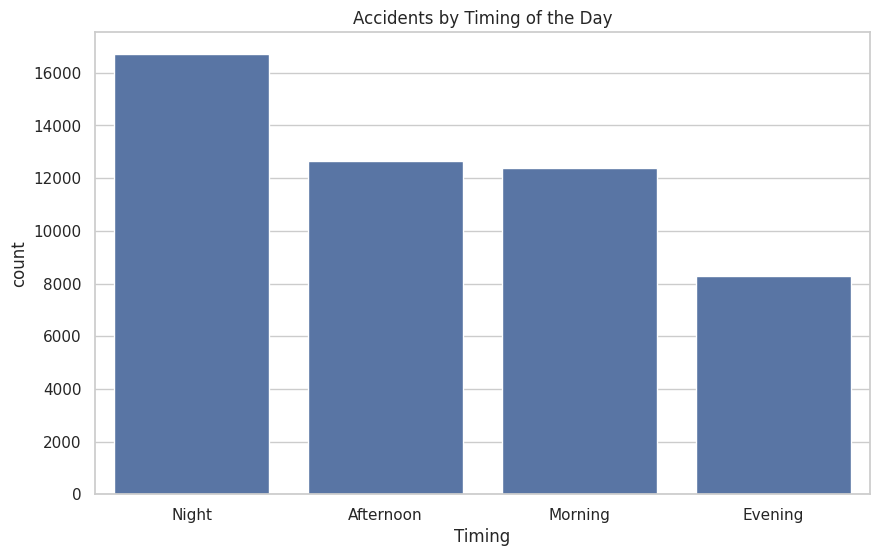

In [53]:
# Explore patterns related to time of day
plt.figure(figsize=(10, 6))
sns.countplot(x="Timing", data=accident_data, order=accident_data['Timing'].value_counts().index)
plt.title("Accidents by Timing of the Day")
plt.show()

<ipython-input-54-2dc3496a77a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_accidents.index, y=state_accidents.values, palette="viridis")


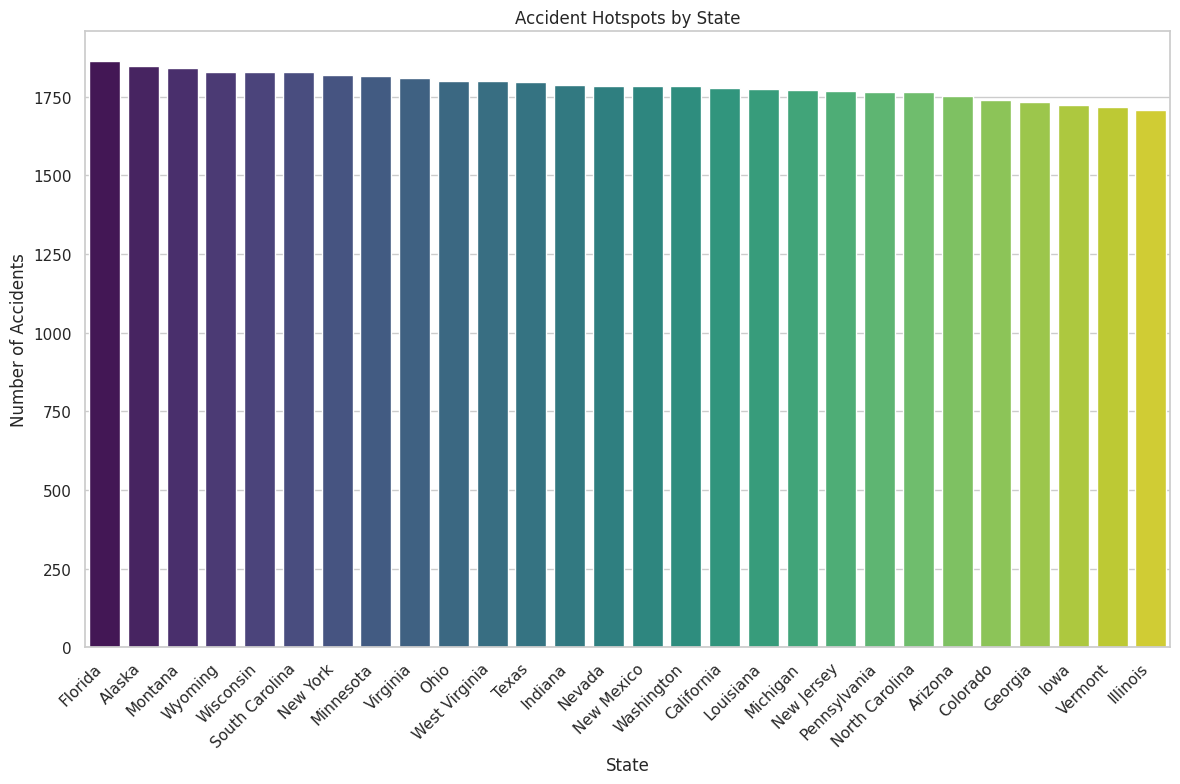

In [54]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Visualize accident hotspots (States with higher accident frequencies)
plt.figure(figsize=(14, 8))
state_accidents = accident_data['State'].value_counts()
sns.barplot(x=state_accidents.index, y=state_accidents.values, palette="viridis")
plt.title("Accident Hotspots by State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-55-0fc9178ea33c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, palette="muted")


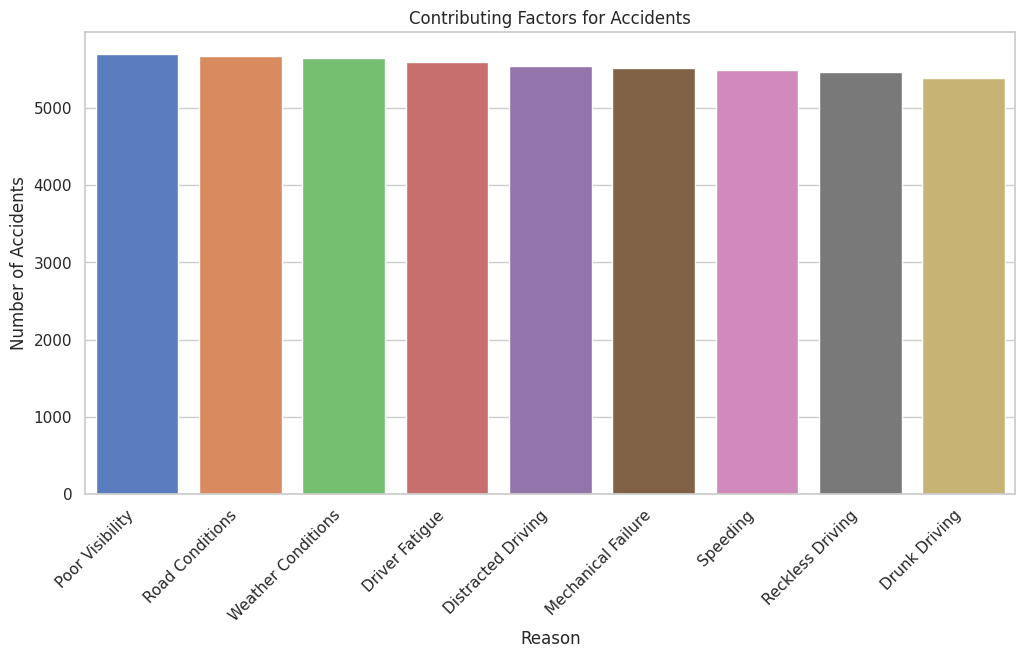

In [55]:
# Visualize contributing factors (Reasons for accidents)
plt.figure(figsize=(12, 6))
reasons_accidents = accident_data['Reason'].value_counts()
sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, palette="muted")
plt.title("Contributing Factors for Accidents")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 4000x800 with 0 Axes>

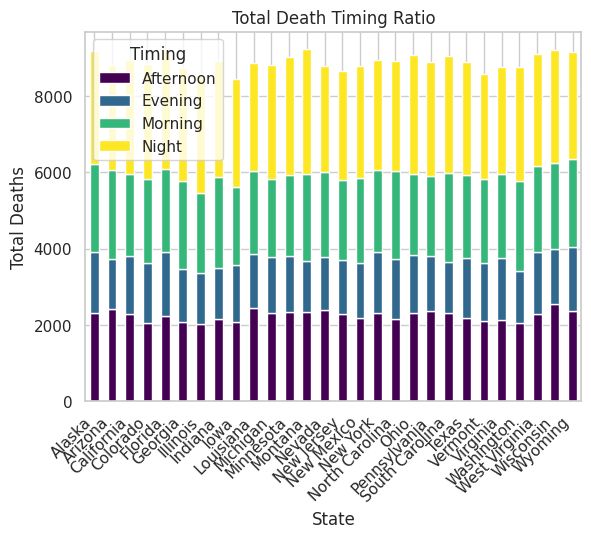

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Group the data by state and timing, and calculate the total number of deaths
state_timing_deaths = accident_data.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

# Pivot the table to get a format suitable for plotting
state_timing_deaths_pivot = state_timing_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

# Create a bar plot for state-wise total death timing ratio
plt.figure(figsize=(40, 8))
state_timing_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Total Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()